In [1]:
from tqdm import tqdm_notebook, tqdm
import pandas as pd
from os.path import join as oj
import torch
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path


import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas
import csv

import numpy as np
np.random.seed(42)
import pickle as pkl

In [113]:
results_folder = "../results"
fnames = sorted([oj(results_folder, fname) for fname in os.listdir(results_folder)]) # filenames in the directory
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in tqdm(fnames) ] 
results = pd.concat(results_list, axis=1).T.infer_objects() # pandas dataframe w/ hyperparams and weights stored

results["final_acc"] = [max(x) for x in results["acc_test"]]
results["min_test_loss"] = [min(x) for x in results["losses_test"]]
results["num_epochs"] = [len(x) for x in results["losses_test"]]
results["min_train_loss"] = [min(x) for x in results["losses_train"]]


100%|██████████| 23/23 [00:00<00:00, 996.42it/s]


In [114]:
results

,weight,repeats,losses_train,losses_test,acc_test,noise,num_in_train,pid,final_acc,min_test_loss,num_epochs,min_train_loss
0,0.10,1,"[595418432.0, 1786772864.0, 2382553088.0, 2382...","[0.7933120131492615, 0.7913216948509216, 0.789...","[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",0.5,20,01223781251163400132,49.0,0.699901,100,1.299245e+00
1,0.01,1,"[597106048.0, 597366912.0, 597029760.0, 597281...","[0.8297381401062012, 0.8273296356201172, 0.824...","[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48....",0.0,50,04625171658342704305,48.0,0.720537,100,5.954194e+08
2,0.00,1,"[0.8614612817764282, 0.6901903748512268, 0.914...","[0.7149209976196289, 0.7100082635879517, 0.705...","[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51....",0.5,50,06835400260253647130,66.0,0.680337,100,5.451192e-01
3,0.00,5,"[0.696530818939209, 0.7168081283569336, 0.8232...","[0.7572888374328614, 0.7556018829345703, 0.754...","[49.6, 50.0, 50.0, 50.2, 50.0, 50.4, 50.4, 50....",0.0,20,08023111623514786278,93.6,0.124913,150,1.311337e-01
4,0.10,1,"[1.0061407089233398, 1.0093443393707275, 0.999...","[0.7670284509658813, 0.7621719837188721, 0.757...","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,20,15768186380208103437,99.0,0.308982,100,4.958425e-01
5,0.00,1,"[0.6926388740539551, 0.7133380174636841, 0.696...","[0.6939116716384888, 0.6938570737838745, 0.693...","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,20,16075028435047882754,83.0,0.472860,100,3.872403e-01
6,0.10,1,"[5962504192.0, 5962938880.0, 5961442304.0, 476...","[0.7796834707260132, 0.7772898077964783, 0.774...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....",0.2,50,21032442173805842253,58.0,0.692836,100,3.572654e+09
7,0.00,1,"[0.662774384021759, 0.5798060297966003, 0.7082...","[0.6766377687454224, 0.6762670278549194, 0.675...","[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51....",0.0,50,30621111402880588754,98.0,0.368712,100,3.591453e-01
8,0.01,5,"[0.8217198371887207, 0.8132652282714844, 0.699...","[0.7237162590026855, 0.7232462406158447, 0.722...","[47.6, 47.8, 47.8, 48.2, 48.4, 48.6, 48.6, 48....",0.0,20,37221585144885731845,83.6,0.263354,150,2.241078e-01
9,0.01,1,"[476798432.0, 536268000.0, 476709920.0, 596064...","[0.7522658705711365, 0.7483693361282349, 0.745...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....",0.2,50,42211482026086083717,69.0,0.679467,100,2.977203e+08


In [115]:
results[[x for x in results.keys() if x not in  ['pid', 'losses_test', 'acc_test','losses_train' ]]].sort_values(['min_train_loss', 'noise', 'weight'])

,weight,repeats,noise,num_in_train,final_acc,min_test_loss,num_epochs,min_train_loss
3,0.00,5,0.0,20,93.6,0.124913,150,1.311337e-01
5,0.00,1,0.0,20,83.0,0.472860,100,3.872403e-01
16,0.00,1,0.0,20,95.0,0.129537,150,1.078948e-01
8,0.01,5,0.0,20,83.6,0.263354,150,2.241078e-01
12,0.01,1,0.0,20,95.0,0.071034,150,4.794842e-02
17,0.01,1,0.0,20,84.0,0.173677,100,1.429917e-01
4,0.10,1,0.0,20,99.0,0.308982,100,4.958425e-01
13,0.10,1,0.0,20,100.0,0.159531,150,2.742787e-01
18,0.10,5,0.0,20,84.4,0.386746,150,4.404281e-01
19,0.00,1,0.2,20,55.0,0.613657,100,4.651076e-01


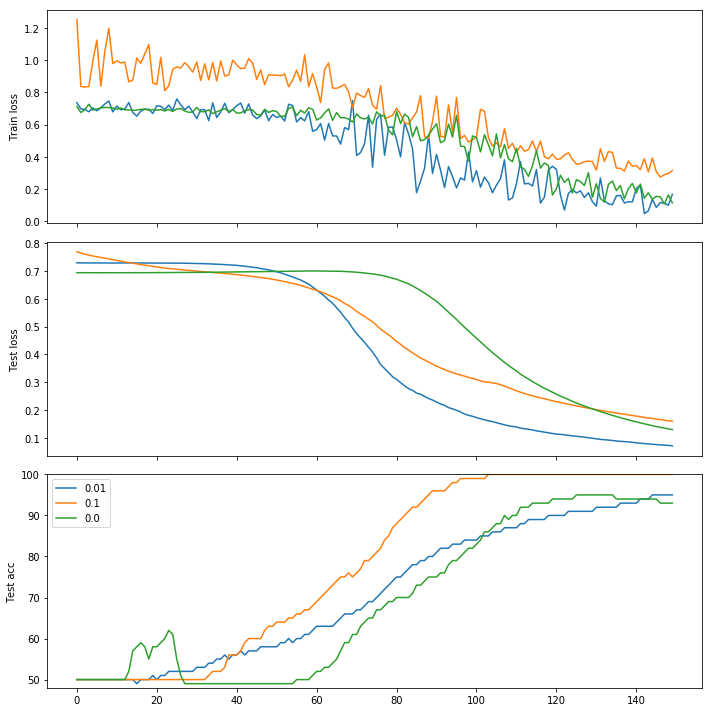

In [120]:
f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for idx in range(len(results)):
  
    if results["num_epochs"][idx] ==150 and \
    results["noise"][idx] ==.0 and \
    results["num_in_train"][idx] ==20 and \
    results["repeats"][idx] ==1:
        
        axes[0].plot(results["losses_train"][idx], label = results["weight"][idx])
        axes[1].plot(results["losses_test"][idx], label = results["weight"][idx])
        axes[2].plot(results["acc_test"][idx], label = results["weight"][idx])
   
 


axes[0].set_ylabel("Train loss")
# axes[0].set_ylim([0, 2])
plt.legend();
axes[1].set_ylabel("Test loss")
#axes[1].set_ylim([0, .8])
axes[2].set_ylabel("Test acc")
axes[2].set_ylim([48, 100])
plt.tight_layout()
plt.legend();